In [1]:
import cupy as cp
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.config import conservative_names
from fvhoe.initial_conditions import double_mach_reflection_2d
from fvhoe.scripting import EulerSolver_wrapper
from itertools import product
import matplotlib.pyplot as plt
import numpy as np

Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/dmr_a_posteriori_slope_limiting=True_all_floors=True_convex=False_cupy=True_CFL=0.6_gamma=1.4_nx=960_ny=240_NAD=0.001_NAD_mode=local_NAD_range=relative_NAD_vars=['rho', 'P', 'vx', 'vy']_px=8_py=8_x=(0, 4)_T=0.2_integrator=3_n_snapshots=2
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'
Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/dmr_a_posteriori_slope_limiting=True_all_floors=True_convex=False_cupy=True_CFL=0.6_gamma=1.4_nx=960_ny=240_NAD=1e-05_NAD_mode=global_NAD_range=relative_NAD_vars=['rho', 'P', 'vx', 'vy']_px=8_py=8_x=(0, 4)_T=0.2_integrator=3_n_snapshots=2
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'
Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/dmr_a_posteriori_slope_limiting=Tru

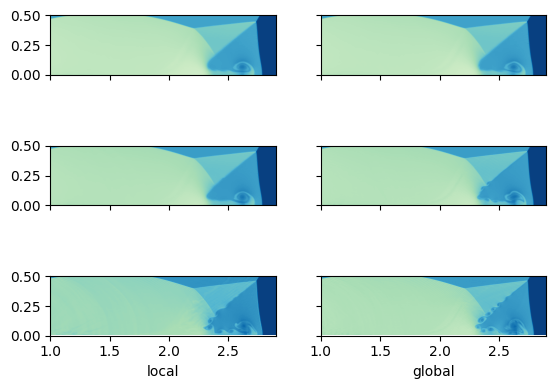

In [11]:
Nx = 960
p = 8

fig, axs = plt.subplots(3, 2, sharex=True, sharey=True)

for (i, NAD), (j, NAD_mode) in product(
    enumerate([(1e-3, 1e-5), (1e-2, 1e-3), (1e-1, 1e-2)]),
    enumerate(["local", "global"]),
):
    # set up solver
    solver_config = dict(
        x=(0, 4),
        nx=Nx,
        ny=Nx // 4,
        px=p,
        py=p,
        CFL=0.6,
        gamma=1.4,
        a_posteriori_slope_limiting=p > 0,
        density_floor=1e-16,
        pressure_floor=1e-16,
        NAD=NAD[j],
        NAD_mode=NAD_mode,
        NAD_range="relative",
        NAD_vars=["rho", "P", "vx", "vy"],
        convex=False,
        cupy=True,
    )

    # run solver
    solver = EulerSolver_wrapper(
        project_pref="dmr",
        snapshot_parent_dir="/scratch/gpfs/jp7427/fvhoe/snapshots",
        summary_parent_dir="out",
        ic=double_mach_reflection_2d,
        bc=BoundaryCondition(),
        T=0.2,
        integrator=3,
        **solver_config,
    )

    solver.plot_2d_slice(
        axs[i, j],
        param="rho",
        z=0.5,
        #         contour=True,
        #         levels=np.linspace(1.5, 22.9705, 30),
        #         colors="k",
        #         linewidths=0.25,
    )
    axs[i, j].set_xlim(1, 2.9)
    axs[i, j].set_ylim(0, 0.5)

    axs[2, j].set_xlabel(NAD_mode)
#     axs[i, 0].set_ylabel(f"NAD={NAD}")

fig.savefig("../../out/dmr-absolute-convex.png", dpi=300, bbox_inches="tight")

t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=[0.5, 0.5]
horizontal_axis='x', vertical_axis='y'
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=[0.5, 0.5]
horizontal_axis='x', vertical_axis='y'
t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=[0.5, 0.5]
horizontal_axis='x', vertical_axis='y'


(0.0, 0.5)

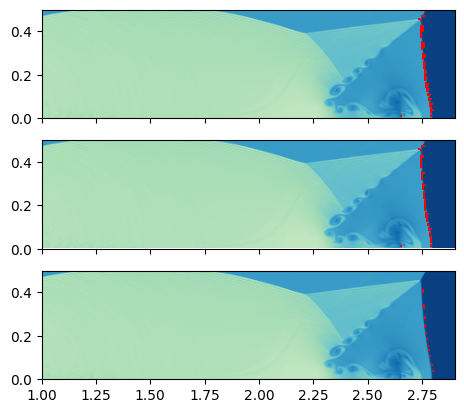

In [4]:
figs, axs = plt.subplots(3, 1, sharex=True, sharey=True)

tol = 1e-5

solver.plot_2d_slice(axs[0], param="rho", overlay_trouble="all", tol=tol)
solver.plot_2d_slice(axs[1], param="rho", overlay_trouble="NAD", tol=tol)
solver.plot_2d_slice(axs[2], param="rho", overlay_trouble="PAD", tol=tol)

axs[2].set_xlim(1, 2.9)
axs[2].set_ylim(0, 0.5)